# 1D convolutions

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$ \mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.

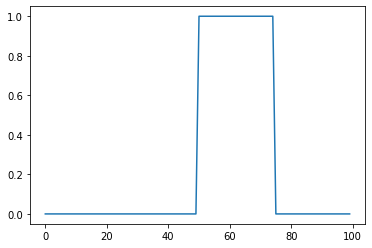

In [28]:
v = np.zeros(100)
v[50:75] = 1
plt.plot(v)

Consider the following kernels $\mathbf{k}$:

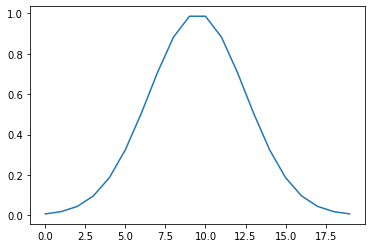

In [31]:
### first kernel
#k = np.ones(10)/10

### second kernel
k = signal.gaussian(20, std=3)
#k = k / np.sum(k)

### third kernel
#k = np.array([-1,2,-1])

N = len(v)
M = len(k)

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$

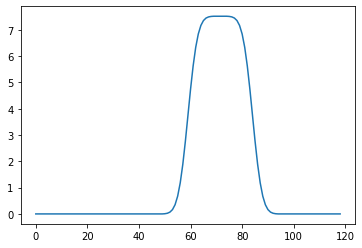

In [34]:
#t0 = time.time()
k_padded = np.zeros(N+M-1)
k_padded[:M] = k
# print(k_padded)
K = linalg.toeplitz(k_padded, np.zeros(N))
v_conv_1 = K @ v

plt.plot(v_conv_1)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.

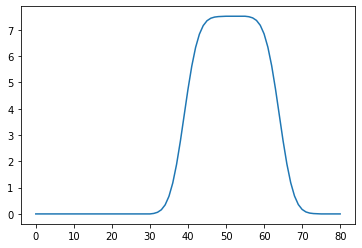

In [35]:
v_conv_2 = np.zeros(N-M+1)
for i in range(N-M+1):
    for j in range(M):
        v_conv_2[i] += k[-j] * v[i+j]

plt.plot(v_conv_2)

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:
- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


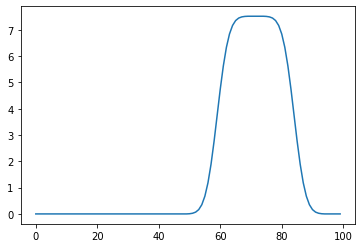

In [44]:
v_dft = np.fft.fft(v)
k_dft = np.fft.fft(k, N)
# v_conv_3 = np.multiply(v_dft, k_dft)
vk_hat = v_dft * k_dft
v_conv_3 = np.real(np.fft.ifft(vk_hat))

freq = np.fft.fftfreq(N)


plt.plot(v_conv_3)

## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

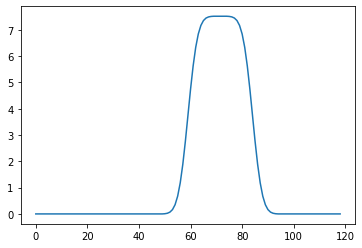

In [45]:
v_conv_4 = signal.convolve(v,k)
plt.plot(v_conv_4)